In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load dataset into a pandas dataframe

In [2]:
#https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression/data
housing_price = pd.read_csv('Housing.csv')

In [3]:
housing_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing_price.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [5]:
housing_price.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
housing_price.shape

(545, 13)

In [7]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


###  Generate at least 3 data visualizations

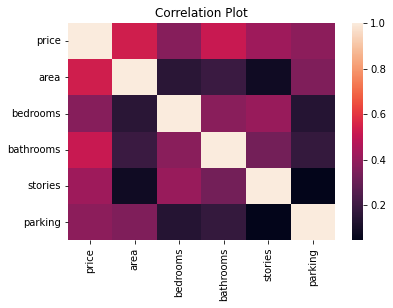

In [8]:
#correlation matrix
sns.heatmap(housing_price.corr())
plt.title('Correlation Plot')
plt.show()

In [9]:
housing_price['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [10]:
housing_price['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

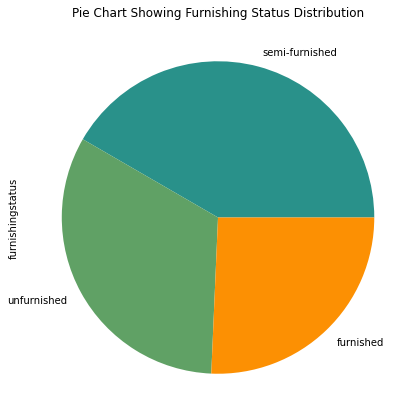

In [11]:
#Plotting the distribution of the furnishing status
colors=['#29918a','#60a165','#fc9003']
data = housing_price.furnishingstatus.value_counts()
count  = housing_price['furnishingstatus'].value_counts()
plt.figure(figsize=(7,10))
data.plot.pie( title = 'Pie Chart Showing Furnishing Status Distribution',colors=colors)
plt.show()

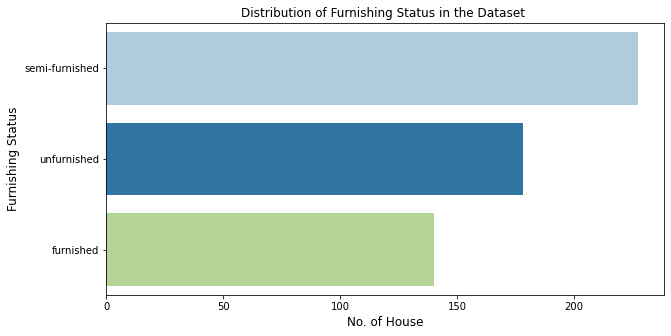

In [12]:
#Plotting the distribution of the Furnishing Status
furnishingstatus_count  = housing_price['furnishingstatus'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x= furnishingstatus_count.values, y = furnishingstatus_count.index,alpha=1, orient = 'h',palette='Paired')
plt.title('Distribution of Furnishing Status in the Dataset ')
plt.ylabel('Furnishing Status', fontsize=12)
plt.xlabel('No. of House', fontsize=12)
plt.show()

<AxesSubplot:xlabel='price', ylabel='area'>

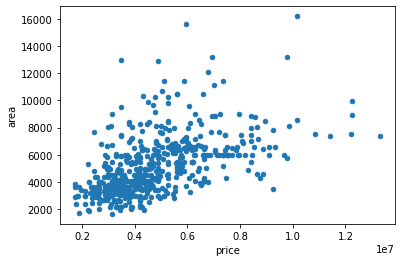

In [13]:
#scatter plot
housing_price.plot(kind='scatter', x = 'price', y = 'area')

### clean dataset if necessary

In [14]:
housing_price.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
#convert datas
furnishing_Status_encoded = pd.get_dummies(housing_price['furnishingstatus'])

In [16]:
furnishing_Status_encoded

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [17]:
housing_price = housing_price.drop(['furnishingstatus'], axis = 1)

In [18]:
housing_price = housing_price.join(furnishing_Status_encoded)

In [19]:
housing_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,0,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1,0,0


In [20]:
housing_price=housing_price.replace({'mainroad':{'yes':1,'no':0},
                                     'guestroom':{'yes':1,'no':0},
                                     'basement':{'yes':1,'no':0},
                                     'hotwaterheating':{'yes':1,'no':0},
                                     'airconditioning':{'yes':1,'no':0},
                                     'prefarea':{'yes':1,'no':0}
                                    })

In [21]:
housing_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


### Divide data into training and test sets

In [22]:
#Splitting the dataset into features and targets
X = housing_price.drop(['price'], axis = 1)
y = housing_price['price']

In [23]:
#check X
print(X)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnished  \
0                  0                1   

In [24]:
#check y
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [25]:
#split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=2)

### Perform standardization (if necessary)

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fit the model to training data

In [27]:
from sklearn.linear_model import LinearRegression

#Loading the Linear Regression Model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

### Make predictions using test data

In [28]:
y_pred = LR.predict(X_test)

In [29]:
#check predictions
y_pred_df = pd.DataFrame(y_pred, columns = ['Predicted Price'])

In [30]:
y_pred_df['Predicted Price']=y_pred_df['Predicted Price'].astype('int64')

In [31]:
X_test_df=pd.DataFrame(X_test)

In [32]:
prediction= pd.concat([y_test.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)

In [33]:
prediction.head()

,price,Predicted Price
0,3920000,3343245
1,6510000,5096333
2,3255000,2327437
3,3500000,3261325
4,5460000,6570893


In [34]:
X_df=pd.DataFrame(X)
X_df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [35]:
#check intercept
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: 4752269.686155969


In [36]:
#check coefficients
#some methods learned from outside soources
#Work Cited: https://linuxhint.com/house-price-prediction-linear-regression/
#Work Cited:https://studygyaan.com/data-science-ml/linear-regression-machine-learning-project-for-house-price-prediction
coefficients = LR.coef_
coefficients=coefficients.astype('int64')
coefficients_df=pd.DataFrame(coefficients,X_df.columns,columns=['Coefficients'])
coefficients_df

,Coefficients
area,495476
bedrooms,39765
bathrooms,450477
stories,441197
mainroad,108884
guestroom,145287
basement,182924
hotwaterheating,191266
airconditioning,421378
parking,258290


### Model Evaluation

In [37]:
#calculate the R square
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.6573760950101463


In [38]:
#calculate the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 1259288013055.053


In [39]:
#calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1122180.027025545


In [40]:
#calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 822923.2195121951


### compare to logistic regression

In [41]:
#Creating a Linear Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#Training the Linear Regression model using the training data
lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
logistic_y_pred = lr.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
logistic_r2 = r2_score(y_test, logistic_y_pred)
print(f'R2: {logistic_r2}')

R2: 0.3353397767811177


In [44]:
from sklearn.metrics import mean_squared_error
logistic_mse = mean_squared_error(y_test, logistic_y_pred)
print(f'MSE: {logistic_mse}')

MSE: 2442907922256.0977


In [45]:
logistic_rmse = mean_squared_error(y_test, logistic_y_pred, squared=False)
print(f'RMSE: {logistic_rmse}')

RMSE: 1562980.4612521864


In [46]:
from sklearn.metrics import mean_absolute_error
logistic_mae = mean_absolute_error(y_test, logistic_y_pred)
print(f'MAE {logistic_mae}')

MAE 1089246.9512195121
